In [1]:
import numpy
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot
from joblib import dump
from joblib import load
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# load data

data = read_csv('D:/Kuliah/TA/DATAGABUNG4.csv', header=None)
dataset = data.values

# split data into X and y

X = dataset[1:,:-2]
Y = dataset[1:,3]
Y = Y.astype(str)

print(Y)

['Trojan-SMS' 'Trojan-SMS' 'RiskTool' ... ' ' ' ' ' ']


In [3]:
#encode string Y as integers

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_Y = label_encoder.transform(Y)

In [4]:
model = XGBClassifier()
n_estimators = range(50, 450, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('D:/Kuliah/TA/n_estimators.png')

Best: 0.566025 using {'n_estimators': 100}
0.557837 (0.004871) with: {'n_estimators': 50}
0.566025 (0.004996) with: {'n_estimators': 100}
0.564909 (0.003788) with: {'n_estimators': 150}
0.565138 (0.004035) with: {'n_estimators': 200}
0.565367 (0.004386) with: {'n_estimators': 250}
0.565224 (0.004469) with: {'n_estimators': 300}
0.565224 (0.004512) with: {'n_estimators': 350}
0.565252 (0.004542) with: {'n_estimators': 400}


Best: 0.566025 using {'learning_rate': 0.1}
0.557837 (0.004871) with: {'learning_rate': 0.05}
0.566025 (0.004996) with: {'learning_rate': 0.1}
0.565281 (0.004122) with: {'learning_rate': 0.15}
0.565138 (0.004259) with: {'learning_rate': 0.2}
0.565310 (0.004307) with: {'learning_rate': 0.25}
0.565653 (0.003883) with: {'learning_rate': 0.3}


ValueError: shape mismatch: objects cannot be broadcast to a single shape

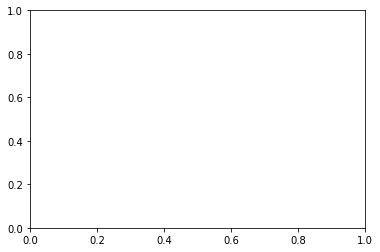

In [34]:
model = XGBClassifier()
learning_rate =[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('gamma')
pyplot.ylabel('Log Loss')
pyplot.savefig('D:/Kuliah/TA/max_depth.png')

In [32]:
import pylab as pl
model = XGBClassifier()
max_depth = range(2, 10, 1)
n_estimators = range(50,400,50)
learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
param_grid = dict(max_depth=max_depth , n_estimators=n_estimators, learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# # plot
# pyplot.errorbar(n_estimators, means, yerr=stds)
# pyplot.title("XGBoost n_estimators vs Log Loss")
# pyplot.xlabel('gamma')
# pyplot.ylabel('Log Loss')
# pyplot.savefig('D:/Kuliah/TA/max_depth.png')

Best: 0.566369 using {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 350}
0.546384 (0.004556) with: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}
0.552196 (0.005134) with: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
0.553399 (0.004737) with: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 150}
0.564565 (0.005198) with: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}
0.565481 (0.005051) with: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 250}
0.565796 (0.005155) with: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300}
0.565539 (0.004824) with: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 350}
0.555603 (0.004410) with: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
0.557837 (0.004871) with: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.566025 (0.004996) with: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
0.566025 (0.004996) with: {'learning_rate': 0.05, '